In [1]:
# installing & importing libraries
!pip install librosa matplotlib
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

In [2]:
from google.colab import files
files.upload()

{}

In [3]:
# function to compute display spectrogram
def display_spectrogram(y, sr, title):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {title}')
    plt.tight_layout()
    plt.show()

# function to compute mel-scaled spectrogram
def mel_spectrogram(y, sr, title):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-scaled spectrogram - {title}')
    plt.tight_layout()
    plt.show()

# function to display chromagram
def chromagram(y, sr, title):
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title(f'Chromagram - {title}')
    plt.tight_layout()
    plt.show()

# function to perform Constant-Q Transform (CQT)
def constant_q_transform(y, sr, title):
    CQT = librosa.cqt(y, sr=sr)
    CQT_dB = librosa.amplitude_to_db(np.abs(CQT), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(CQT_dB, sr=sr, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Constant-Q Transform - {title}')
    plt.tight_layout()
    plt.show()

# function for beat tracking
def beat_tracking(y, sr, title):
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    print(f'{title} - Tempo: {tempo} BPM')
    plt.figure(figsize=(10, 4))
    times = librosa.times_like(beats, sr=sr)
    plt.plot(times, beats, label='Beats')
    plt.title(f'Beat Tracking - {title}')
    plt.tight_layout()
    plt.show()

# function for MFCCs
def mfccs(y, sr, title):
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    print(mfccs.shape)
    plt.figure(figsize=(15, 10))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs - {title}')
    plt.tight_layout()
    plt.show()

In [4]:
# audio files
audio_files = {
    '/content/1_kepler_star_KIC12268220C.mp3': 'Kepler Star KIC12268220C',
    '/content/2_kepler_star_KIC7671081B.mp3': 'Kepler Star KIC7671081B',
    '/content/3_whistler_waves.mp3': 'Whistler Waves',
    '/content/4_parker_solar_probe_whistler_mode_waves2.mp3': 'Whistler Waves 2',
    '/content/5_NASA_Juno_mission_europa_flyby.wav': 'Juno Mission Europa Flyby'
}

# looping through all the audio files
for file_path, title in audio_files.items():
    print(f"Processing: {title}")
    y, sr = librosa.load(file_path)
    print(f"Sample rate: {sr}")
    print(f"Duration: {librosa.get_duration(y=y, sr=sr)} seconds")

Processing: Kepler Star KIC12268220C
Sample rate: 22050
Duration: 7.032018140589569 seconds
Processing: Kepler Star KIC7671081B
Sample rate: 22050
Duration: 20.59201814058957 seconds
Processing: Whistler Waves
Sample rate: 22050
Duration: 30.88417233560091 seconds
Processing: Whistler Waves 2
Sample rate: 22050
Duration: 14.0 seconds
Processing: Juno Mission Europa Flyby
Sample rate: 22050
Duration: 11.82984126984127 seconds


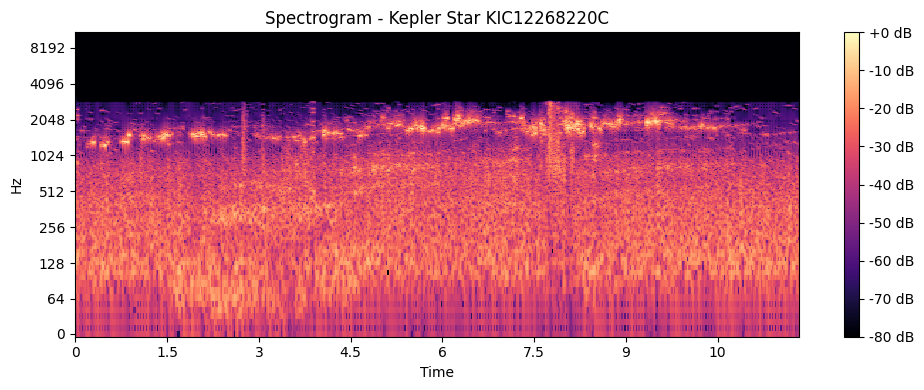

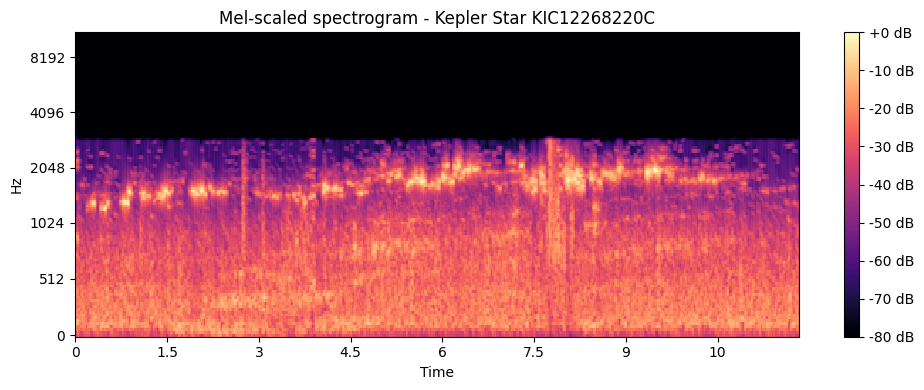

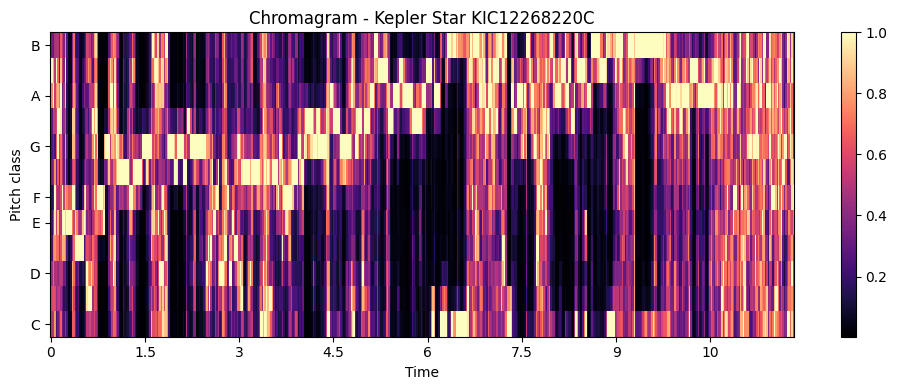

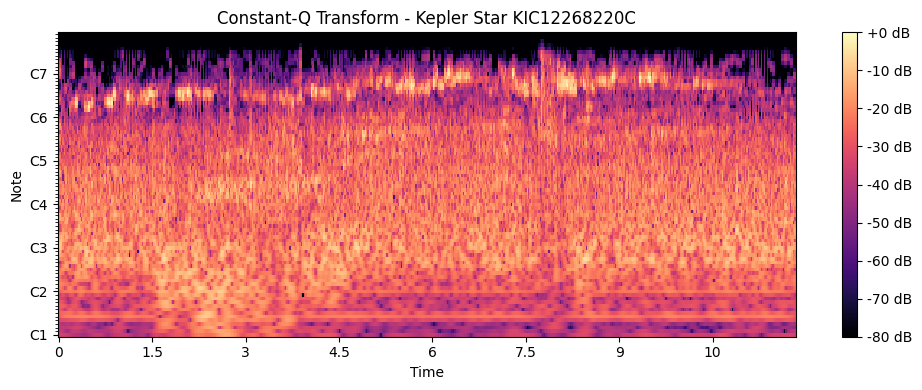

Kepler Star KIC12268220C - Tempo: [172.265625] BPM


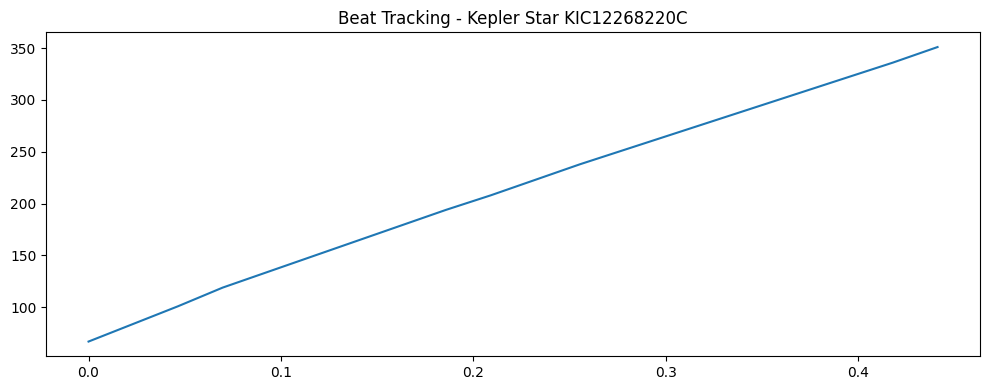

(20, 510)


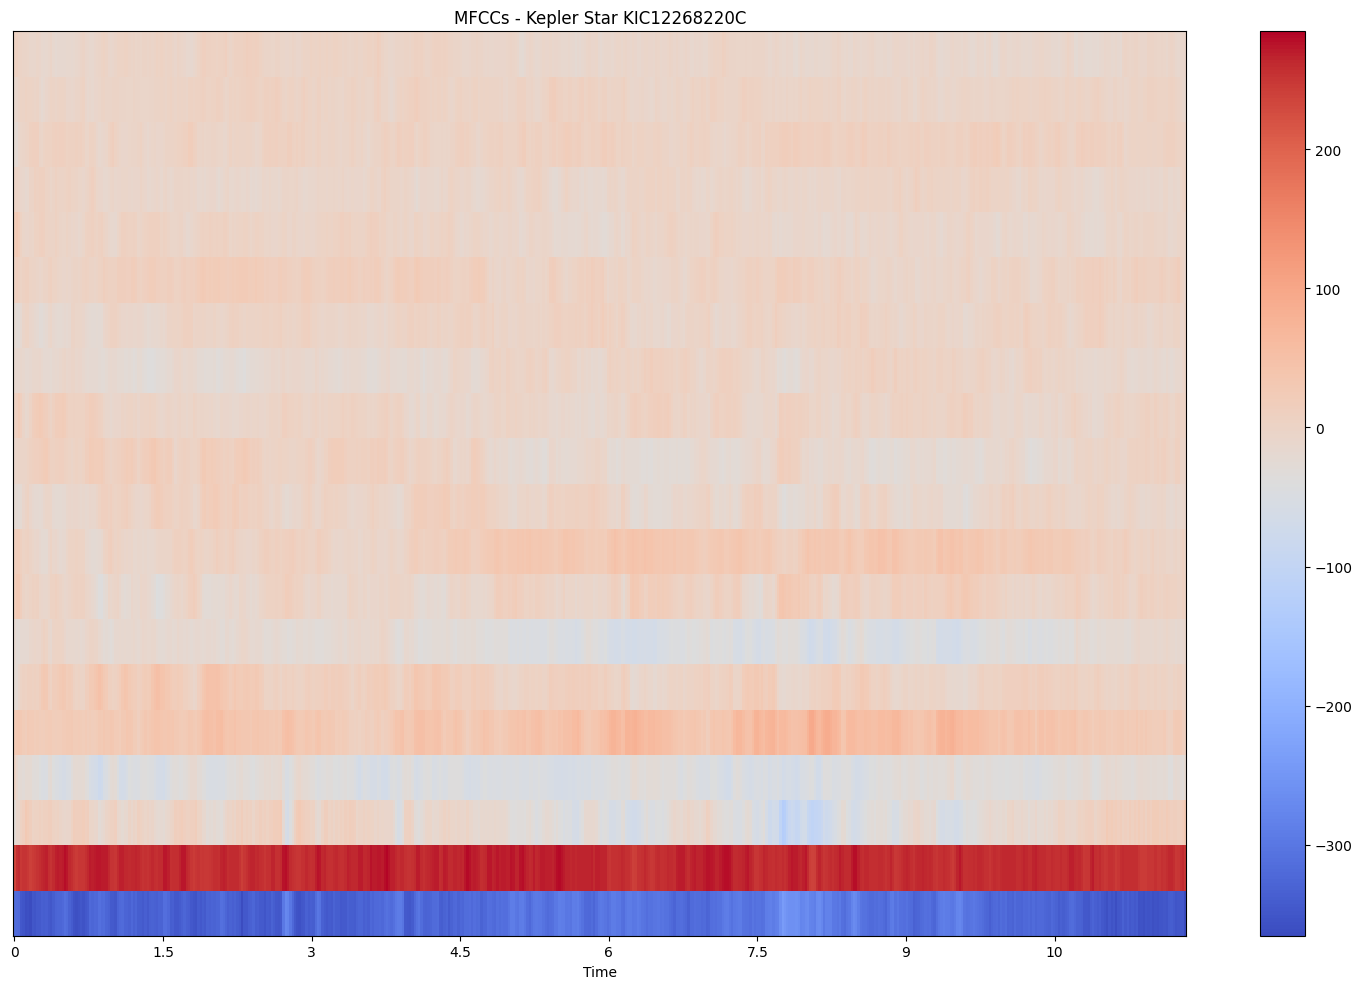

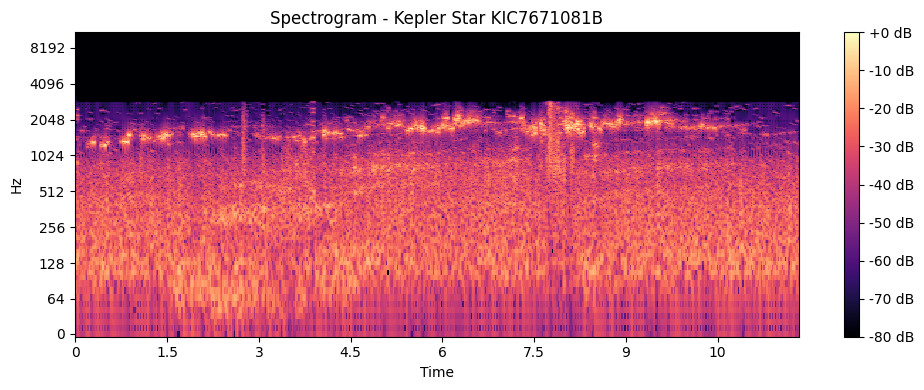

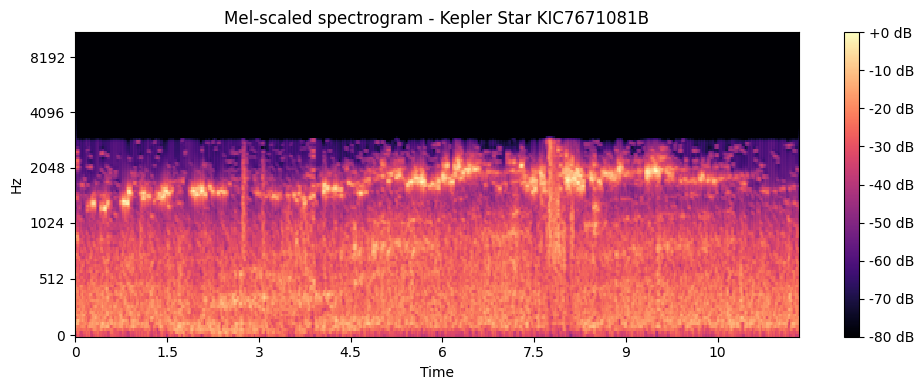

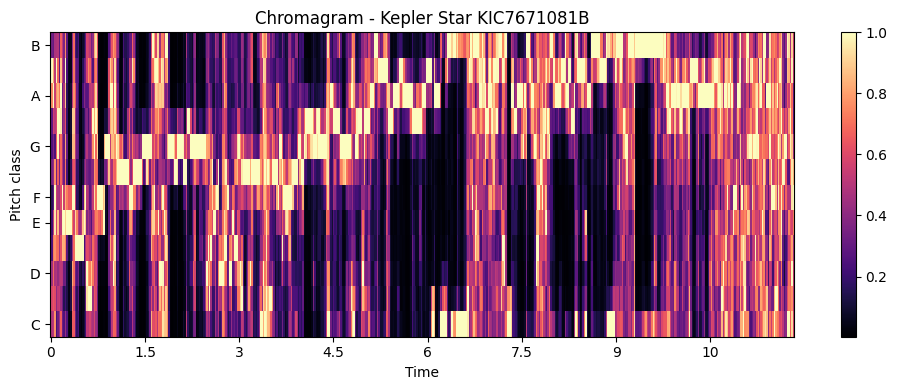

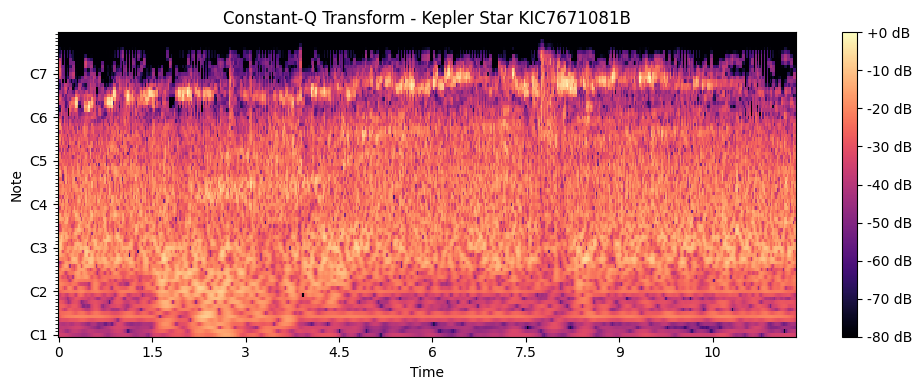

Kepler Star KIC7671081B - Tempo: [172.265625] BPM


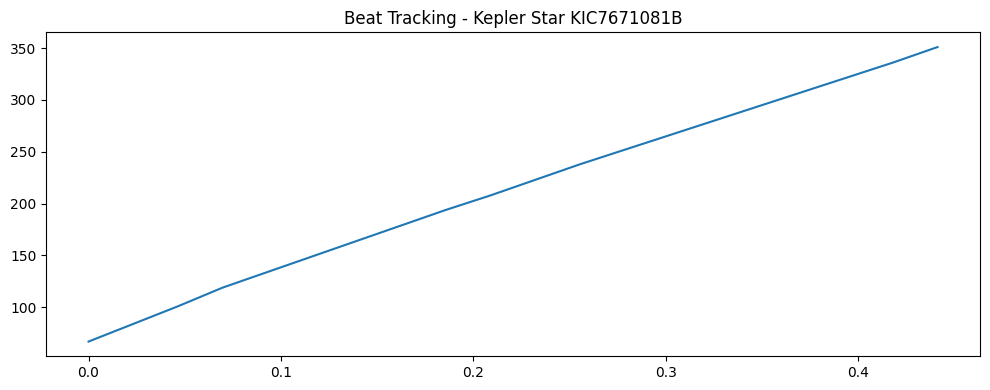

(20, 510)


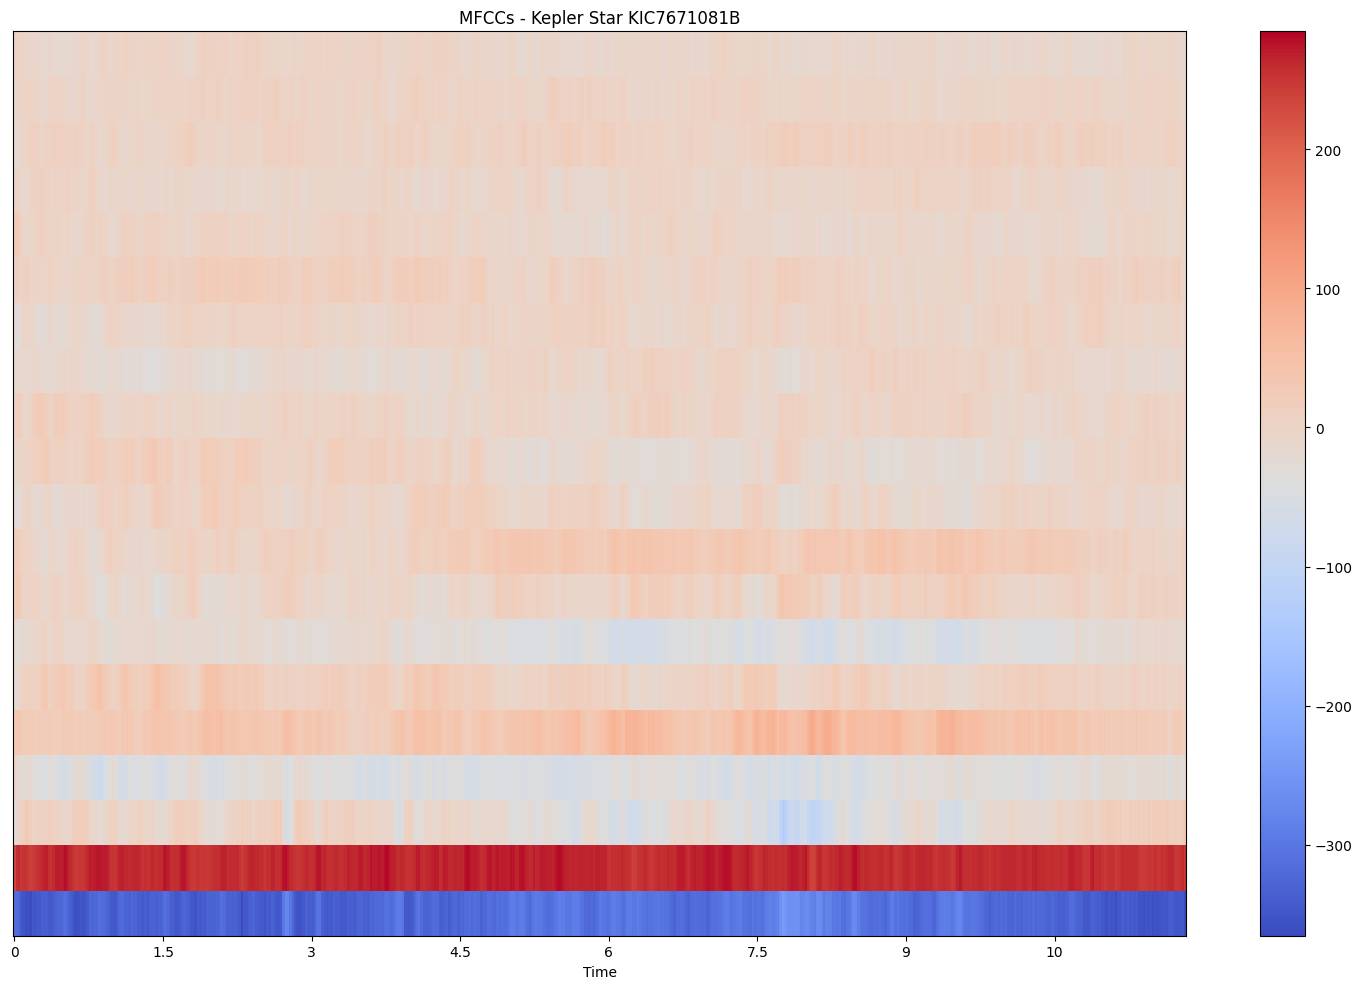

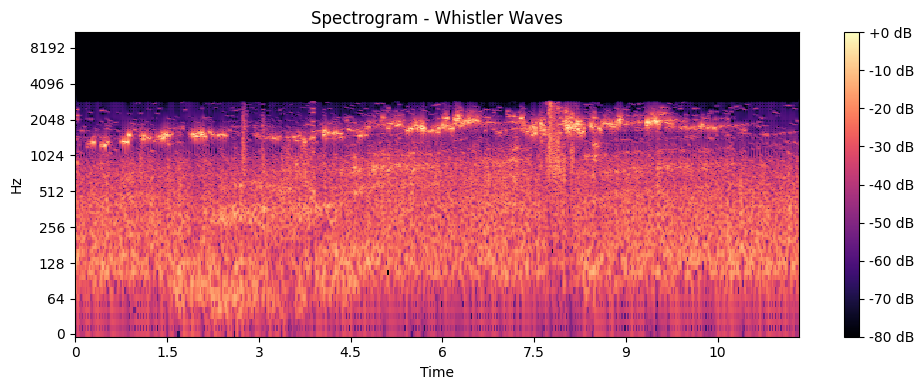

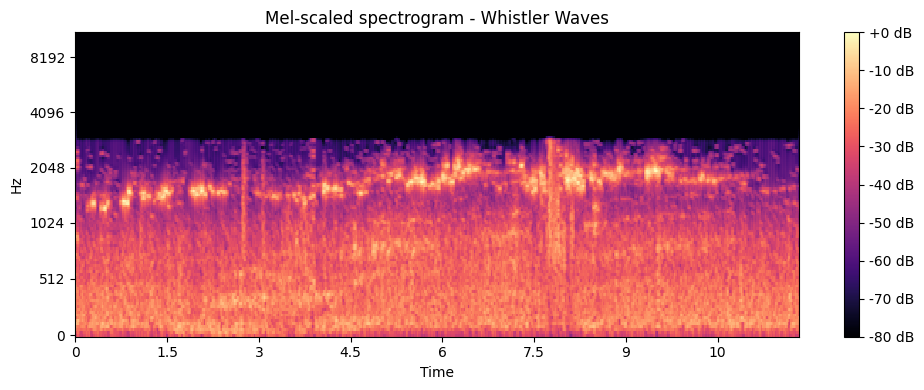

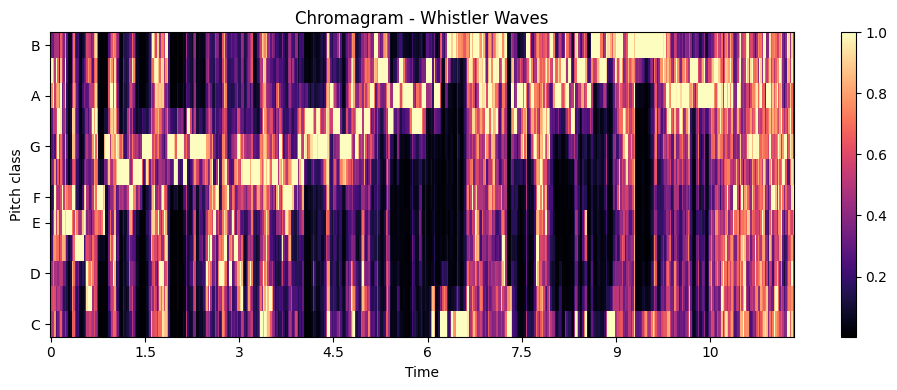

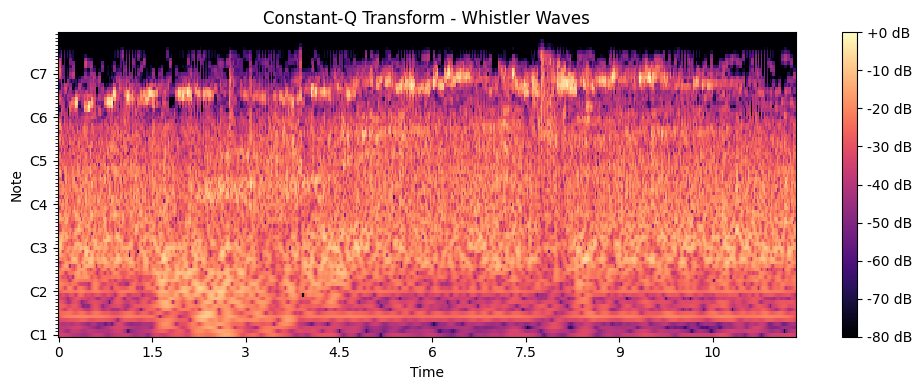

Whistler Waves - Tempo: [172.265625] BPM


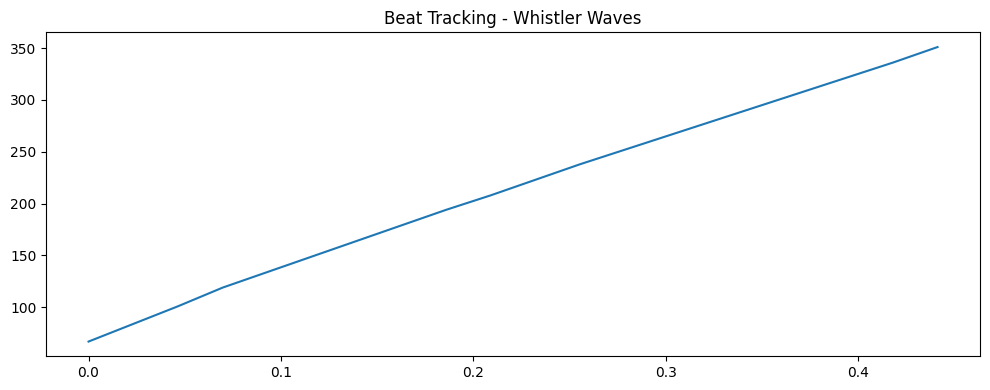

(20, 510)


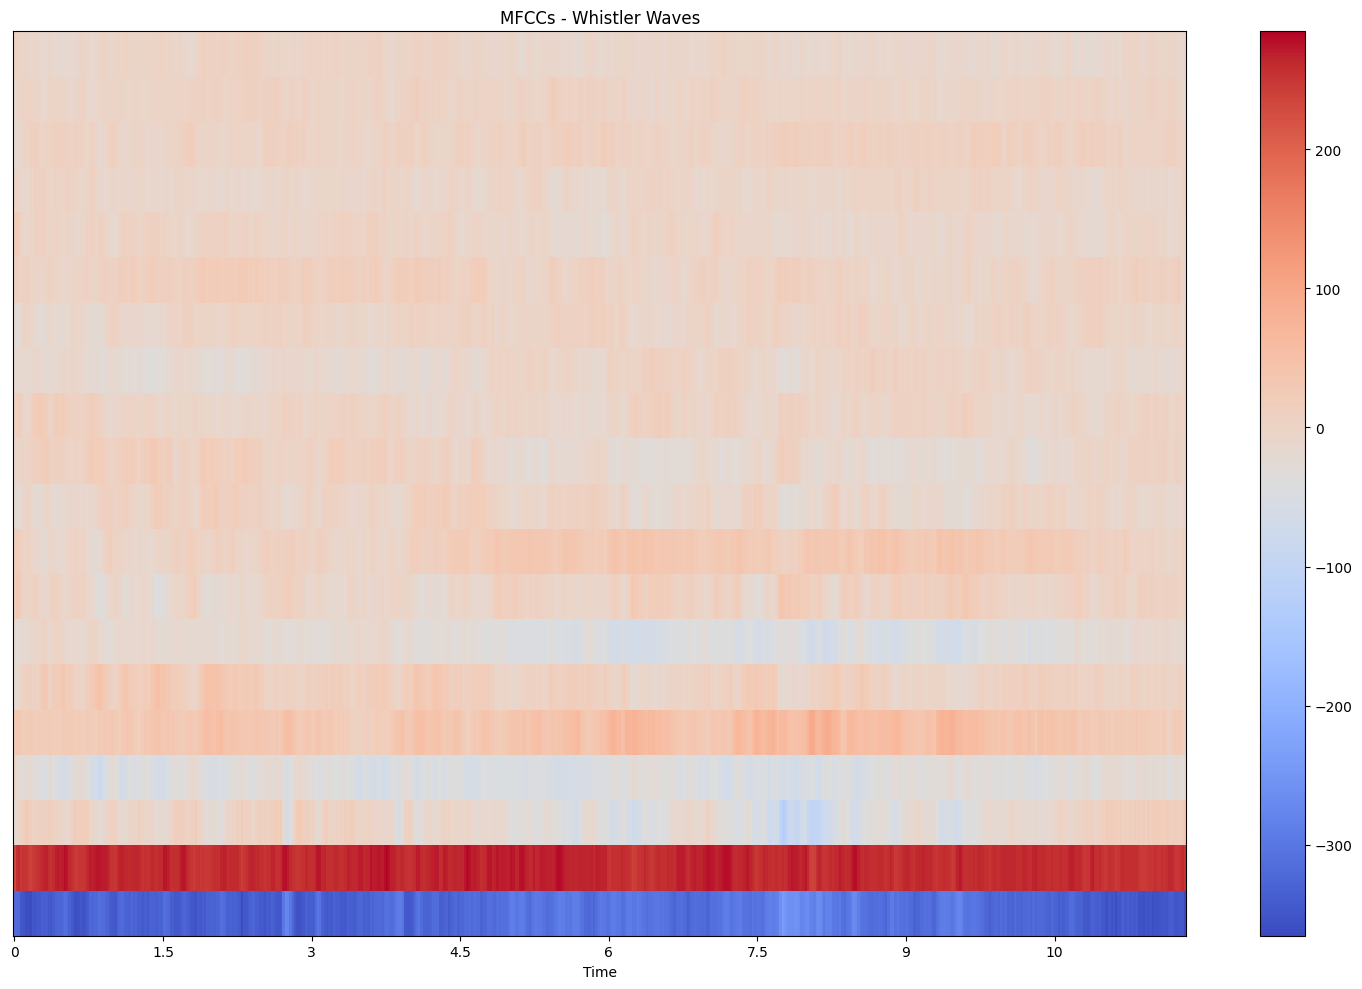

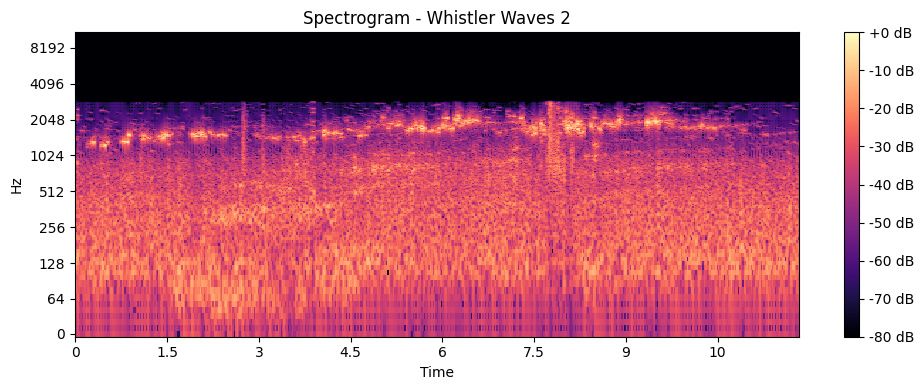

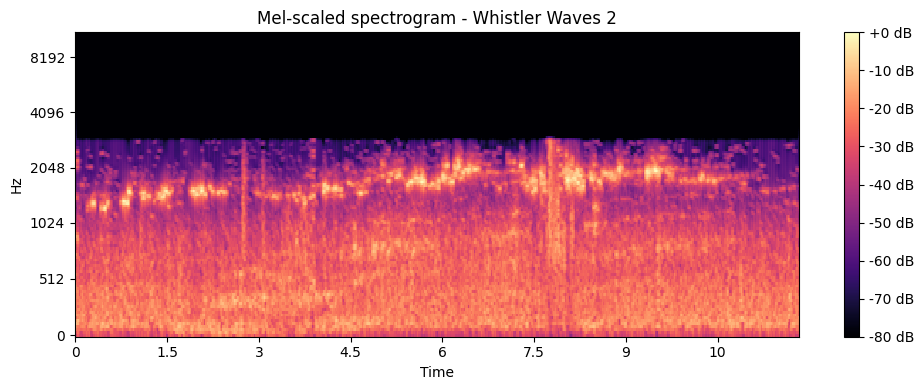

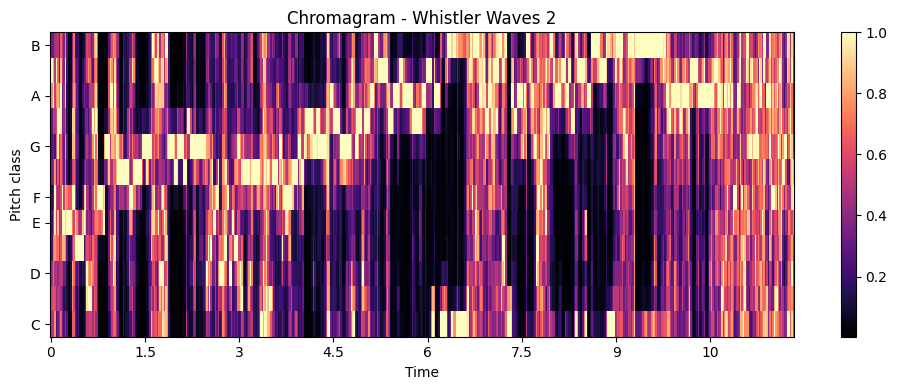

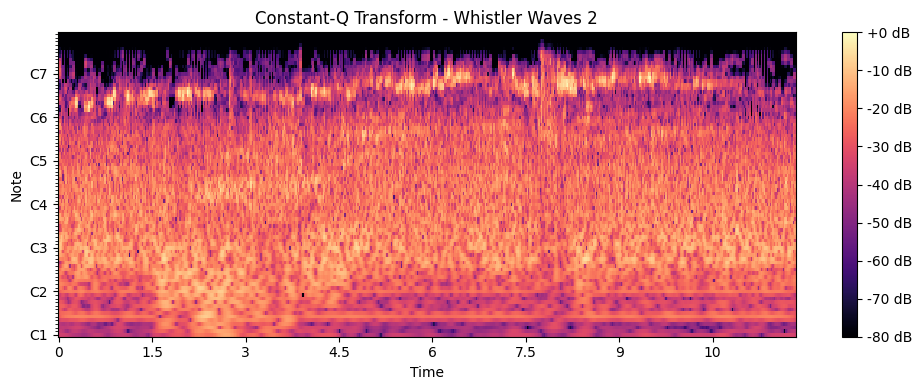

Whistler Waves 2 - Tempo: [172.265625] BPM


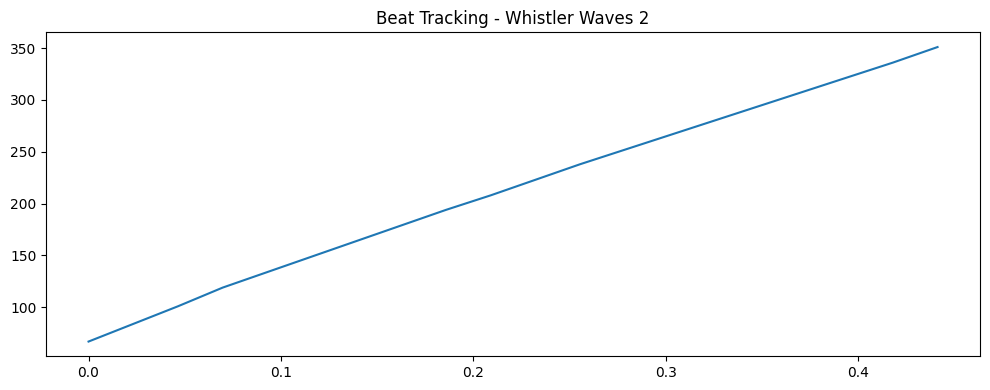

(20, 510)


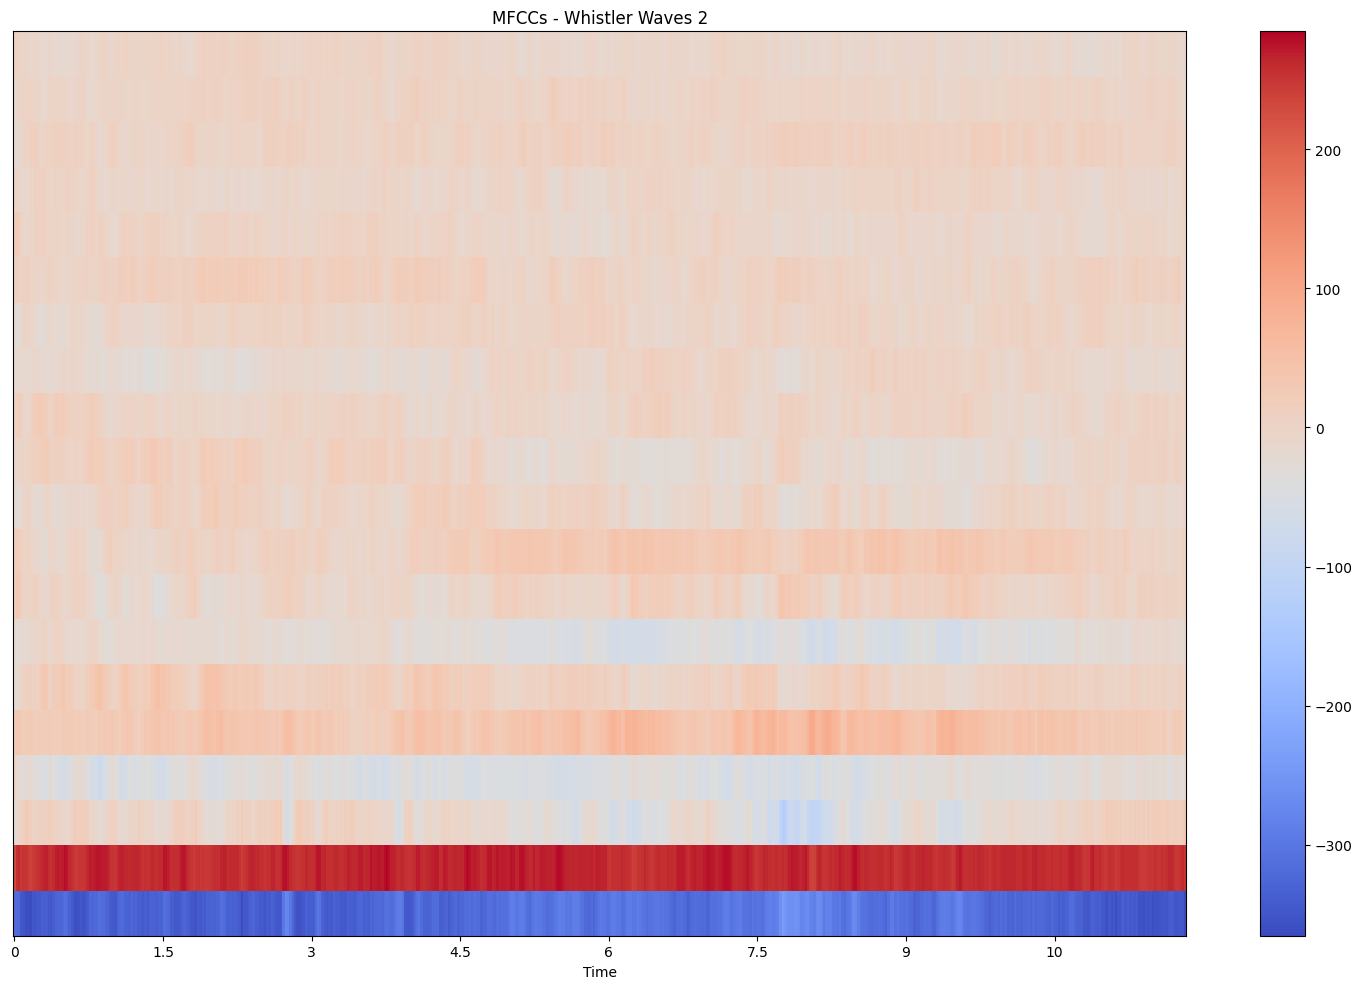

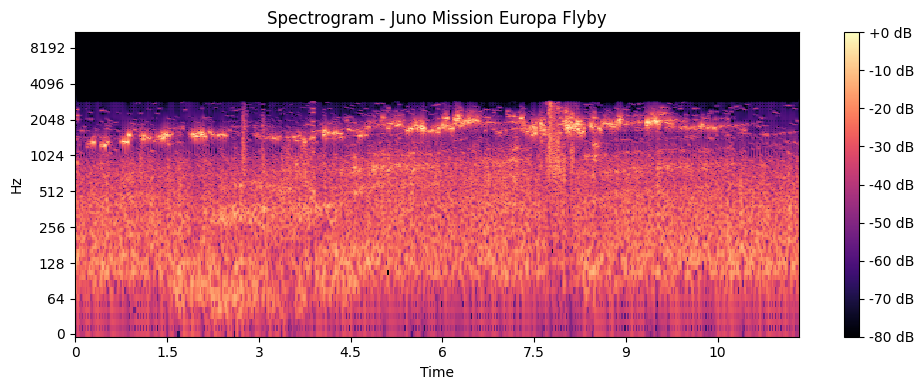

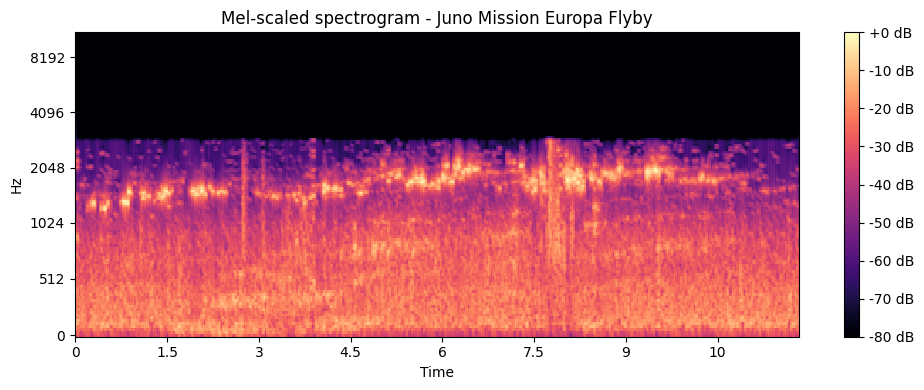

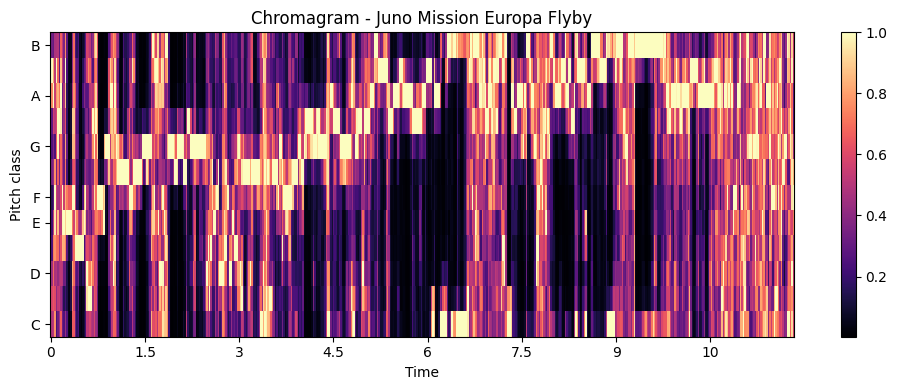

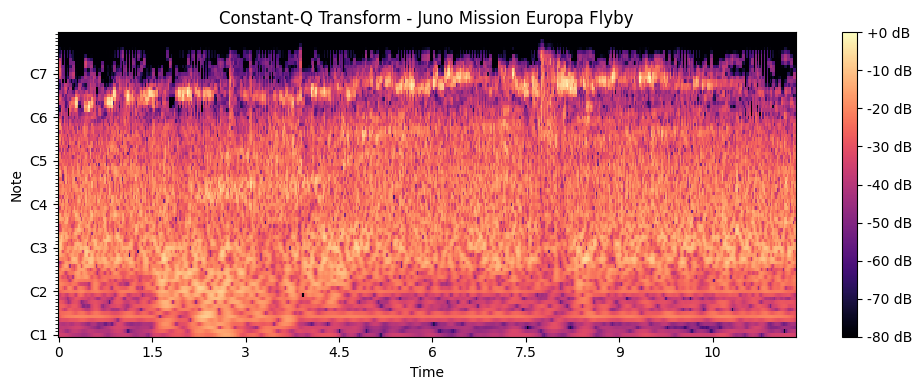

Juno Mission Europa Flyby - Tempo: [172.265625] BPM


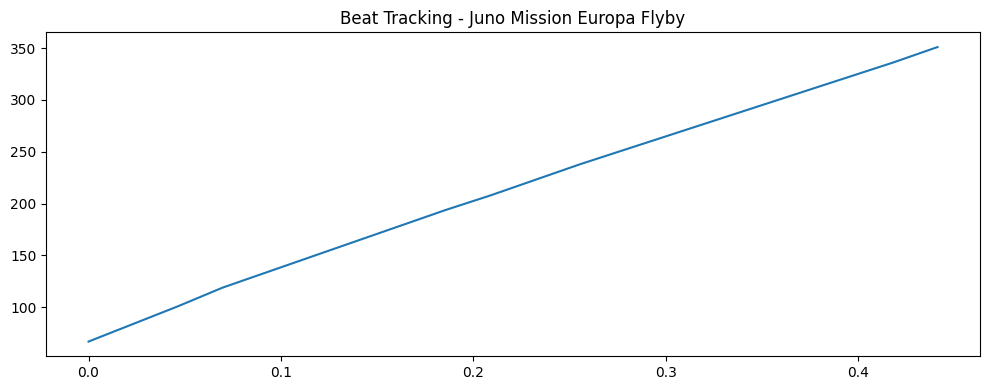

(20, 510)


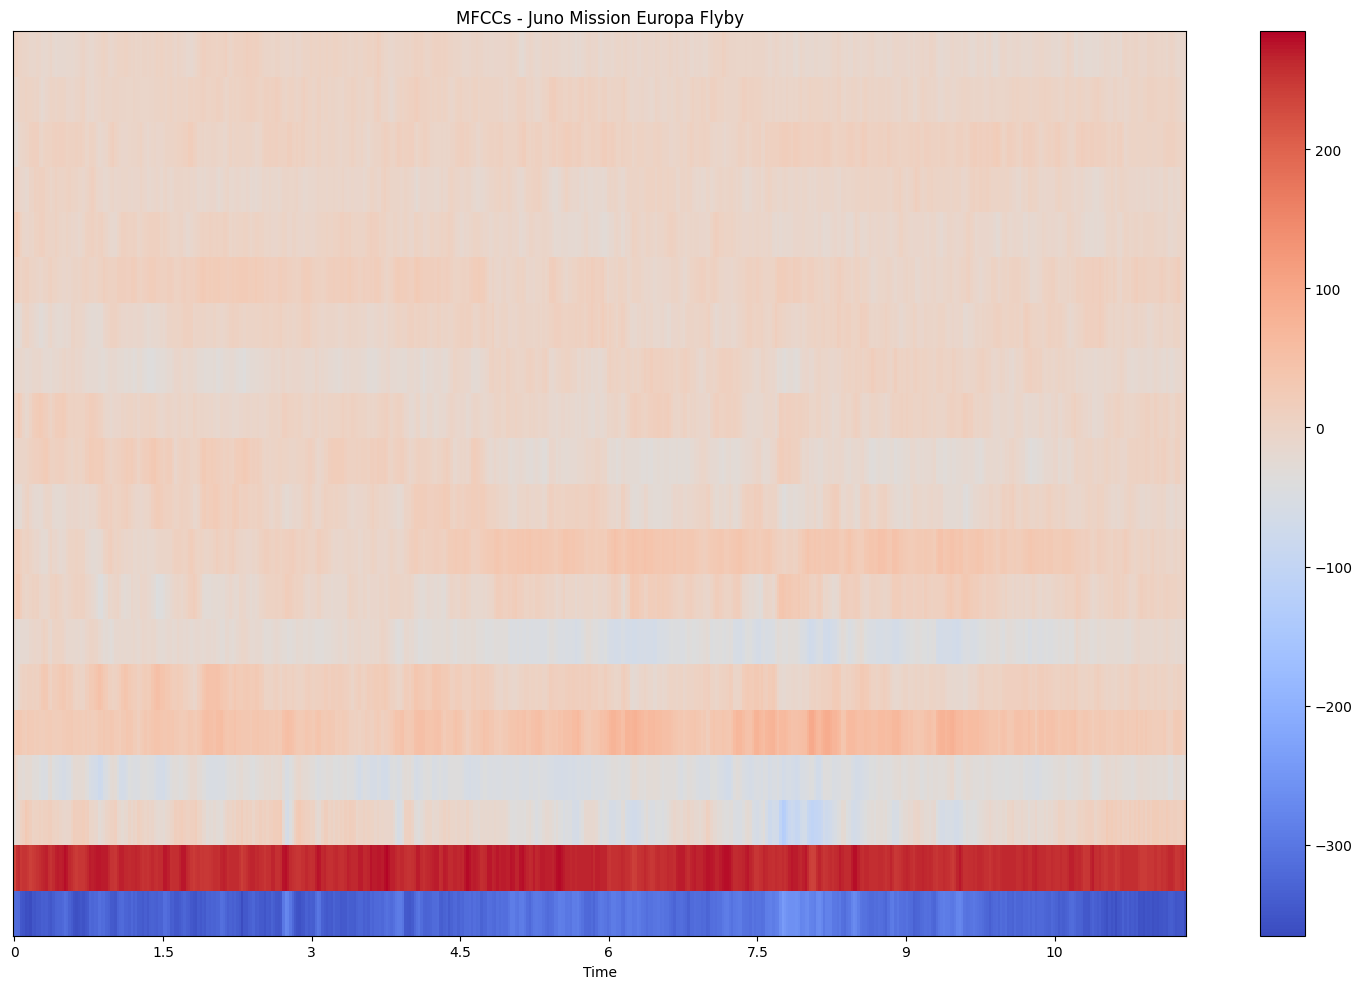

In [5]:
# feature engineering spectrograms of audio file
for file_path, title in audio_files.items():
    display_spectrogram(y, sr, title)
    mel_spectrogram(y, sr, title)
    chromagram(y, sr, title)
    constant_q_transform(y, sr, title)
    beat_tracking(y, sr, title)
    mfccs(y, sr, title)